#Librerias y dataset

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [37]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [16]:
##df["age"] = 5

In [32]:
df["age"].head(6)

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN


# Entrenamiento del modelo

## Revision nulos y duplicados

In [ ]:
#df.drop_duplicates(inplace=True) depende de como estan duplicados los datos


In [38]:
df = df[['pclass','sex','age','sibsp','parch','embarked', 'fare']]

In [39]:
df = df.dropna(subset=['fare'])

In [35]:
df["age"].median()

24.0

In [40]:
df["age"] = df["age"].fillna(df["age"].median()) #OJO ESTO DEBE TOMARSE COMO UNA DECISION BIEN REVISADA (KNN)

In [10]:
df["embarked"].mode()[0] #OJO ESTO DEBE TOMARSE COMO UNA DECISION BIEN REVISADA

'S'

In [9]:
df["embarked"].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [41]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    891 non-null    int64  
 1   sex       891 non-null    object 
 2   age       891 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   embarked  891 non-null    object 
 6   fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## Transformación de datos

In [44]:
df['sex'].value_counts()

,count
sex,
male,577
female,314


In [45]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [46]:
df['embarked'].value_counts()

,count
embarked,
S,646
C,168
Q,77


In [47]:
df = pd.get_dummies(df, columns=['embarked'], drop_first=True) # drop_first=False para arboles de decision no es estrictamente necesario

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    float64
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   embarked_Q  891 non-null    bool   
 7   embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.6 KB


## Division de datos para entrenamiento y test

In [50]:
X = df.drop(columns=["fare"])
y = df['fare']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelo de arboles de decision

In [ ]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

decisionfigure = plt.figure(figsize=(25,10))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()


In [ ]:
y_pred = tree.predict(X_test)
y_pred

In [74]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(r2)

18.179935001362587
2865.5602905814258
-0.8518194653884639


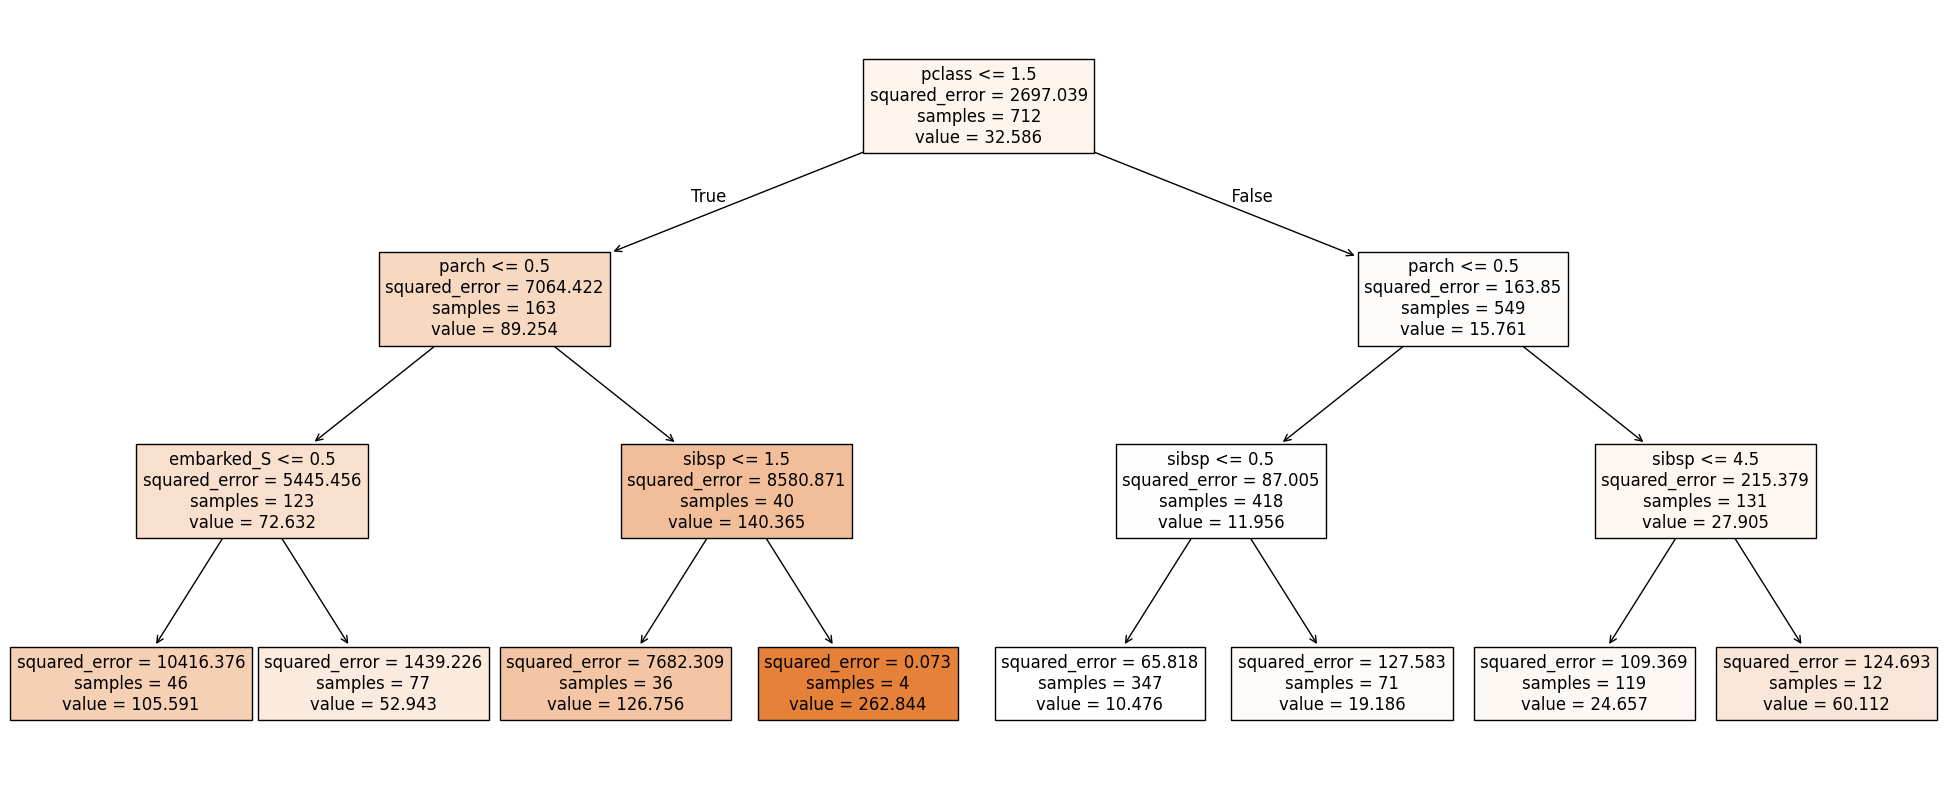

In [85]:
tree = DecisionTreeRegressor(max_depth=3,random_state=42)
tree.fit(X_train, y_train)

decisionfigure = plt.figure(figsize=(25,10))
plot_tree(tree, feature_names=X.columns, filled=True)
plt.show()


In [86]:
y_pred = tree.predict(X_test)

In [87]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(r2)

15.719900987513732
902.83904194876
0.4165556671452353


In [89]:
resultados = pd.DataFrame(
    {'Valor Real':y_test,
     'Valor prediccion':y_pred,
     'Diferencia': y_test - y_pred}
    )
resultados.head(10)

,Valor Real,Valor prediccion,Diferencia
709,15.2458,24.656829,-9.411029
439,10.5000,10.476414,0.023586
840,7.9250,10.476414,-2.551414
720,33.0000,24.656829,8.343171
39,11.2417,19.186093,-7.944393
290,78.8500,52.943181,25.906819
300,7.7500,10.476414,-2.726414
333,18.0000,19.186093,-1.186093
208,7.7500,10.476414,-2.726414
136,26.2833,126.756136,-100.472836


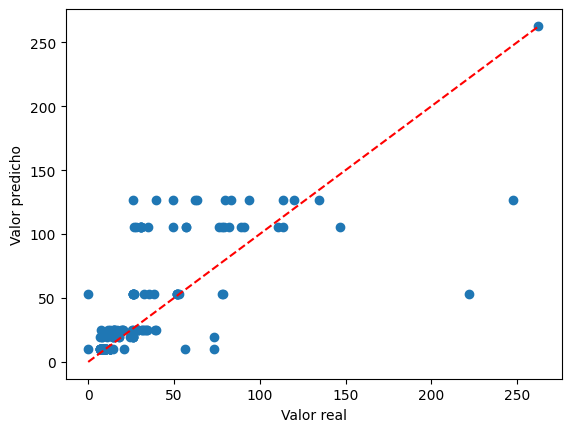

In [91]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valor real")
plt.ylabel("Valor predicho")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.show()

In [92]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked_Q', 'embarked_S'], dtype='object')

In [93]:
tree.feature_importances_

array([0.67388658, 0.        , 0.        , 0.08422721, 0.16265091,
       0.        , 0.0792353 ])

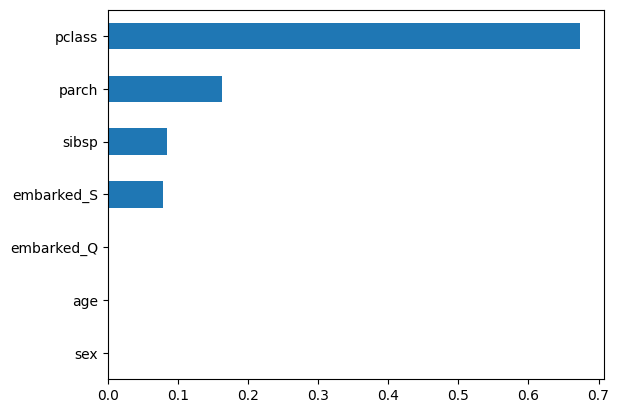

In [95]:
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.show()


In [97]:
for d in range(1, 10):
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Profundidad {d}: MAE={mae:.2f}, R2={r2:.2f}")

Profundidad 1: MAE=19.70, R2=0.31
Profundidad 2: MAE=17.23, R2=0.39
Profundidad 3: MAE=15.72, R2=0.42
Profundidad 4: MAE=14.99, R2=0.38
Profundidad 5: MAE=15.61, R2=0.02
Profundidad 6: MAE=16.42, R2=-0.56
Profundidad 7: MAE=14.76, R2=-0.36
Profundidad 8: MAE=17.40, R2=-0.73
Profundidad 9: MAE=17.06, R2=-0.73


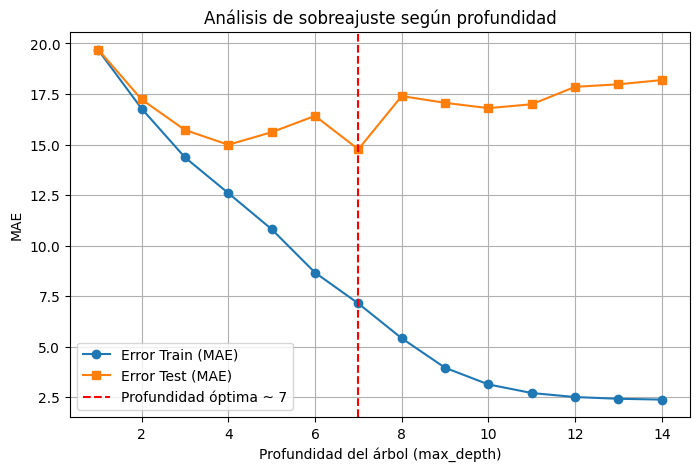

In [99]:
train_errors, test_errors = [], []
depths = range(1, 15)

for d in depths:
    tree = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)

    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_errors.append(train_mae)
    test_errors.append(test_mae)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(depths, train_errors, label="Error Train (MAE)", marker="o")
plt.plot(depths, test_errors, label="Error Test (MAE)", marker="s")
plt.axvline(x=depths[test_errors.index(min(test_errors))], color='r', linestyle='--',
            label=f"Profundidad óptima ~ {depths[test_errors.index(min(test_errors))]}")
plt.xlabel("Profundidad del árbol (max_depth)")
plt.ylabel("MAE")
plt.title("Análisis de sobreajuste según profundidad")
plt.legend()
plt.grid(True)
plt.show()

## Poda

In [115]:
tree_no_pruned = DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=3, max_depth=3, random_state=42)
tree_no_pruned.fit(X_train, y_train)
y_pred_np = tree_no_pruned.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae,mse,r2)

17.510123192806887 1202.3653891598537 0.22299187371003804


In [116]:
tree_pruned = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=10, random_state=42, ccp_alpha=0.11)
tree_pruned.fit(X_train, y_train)
y_pred = tree_pruned.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae,mse,r2)

17.116537779665027 1406.5708725022005 0.09102756284373625


## Validacion cruzada

In [ ]:
# Parámetros a explorar
max_depth_vals = [2, 3, 4, 8, None]
min_samples_split_vals = [2, 5, 10]
min_samples_leaf_vals = [1, 2, 4]
max_leaf_nodes_vals = [None, 10, 20]
ccp_alpha_vals = [0.0, 0.001, 0.01]

results = []

In [119]:
param_grid_tree = {
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [120]:
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

print( grid_tree.best_params_, grid_tree.best_score_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.4632077626872745


## Random forest

In [122]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f"Random Forest (baseline) -> MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}, "
      f"R²: {r2_score(y_test, y_pred_rf):.3f}")

# ===============================
# 2. Búsqueda de hiperparámetros
# ===============================
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 8],
    'max_features': ['sqrt', None],
    'min_samples_leaf': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid_rf,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

print(f"Mejor RF: {grid_rf.best_params_}, "
      f"MAE CV: {-grid_rf.best_score_:.2f}")



Random Forest (baseline) -> MAE: 15.04, R²: -0.089
Mejor RF: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 100}, MAE CV: 13.32


## GradientBoosting

In [123]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("Gradient Boosting -> MAE:", mean_absolute_error(y_test, y_pred_gb), "R2:", r2_score(y_test, y_pred_gb))

# Ajuste de parámetros - Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [2, 3, 5],
    'min_samples_leaf': [1, 2, 5]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                       param_grid_gb,
                       scoring='neg_mean_absolute_error',
                       cv=3,
                       n_jobs=-1)
grid_gb.fit(X_train, y_train)

print("Mejor GB:", grid_gb.best_params_, "MAE:", -grid_gb.best_score_)

Gradient Boosting -> MAE: 15.440485956753793 R2: 0.1878630443046383
Mejor GB: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 100} MAE: 12.859279874779972
